# Занятие 2. Спектры импульсных и периодических сигналов.


In [2]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy.integrate as integrate # импорт модуля численного интегрирования
import scipy.interpolate as spi

def integrate_function(t, func, f, tau, real_part=True):
    # Подынтегральное выражение для использованиия в функции integrate.quad
    # t - время
    # func - функция, задающая импульс
    # f - частота
    # tau - константа, используемая для задания длительности импульса
    if real_part:
        return func(t, tau)*np.cos(-2*np.pi*f*t)  # действительная часть интеграла
    else:
        return func(t, tau)*np.sin(-2*np.pi*f*t)  # мнимая часть интеграла

def fourier_transform(signal, f_band, tau, t1, t2, res_type='abs'):
    # вычисление преобразования Фурье для набора частот
    # signal - функция от t и tau, задающая сигнал во временной области 
    # f_band - набор частот, для которых вычисляется преобразование Фурье
    # tau - константа, используемая для задания длительности импульса
    # t1 момент начала сигнала
    # t2 момент завершения сигнала
    # тип возвращаемого значения:
    # res_type='abs' - |X(f)|
    # res_type='Re' - Re X(f)
    # res_type='Im' - Im X(f)
    if res_type=="abs":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        return Re
    elif res_type=="Im":
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return Im

def get_main_width(arr):
  middle = len(arr) / 2 + 1
  for i in range(int(middle), len(arr)):
      if (arr[i] < 100):
          return 2 * f_band[i] / 1e3

def get_level_in_db(side_level, init_level):
  return 20 * np.log10(side_level / init_level)

def get_side_level(arr):
  middle = len(arr) / 2 + 1
  i = int(middle)
  while (arr[i] < arr[i - 1]):
    i += 1
    continue
  while (arr[i] > arr[i - 1]):
    i += 1
    continue
  return arr[i]

Для заданного параметра $\tau$ из таблицы, построить графики модуля спектральной плотности $|X(f)|$ для прямоугольного окна, 
$$w_b(t)=\left\{ \begin{matrix}
   1, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2; \\
\end{matrix} \right.$$

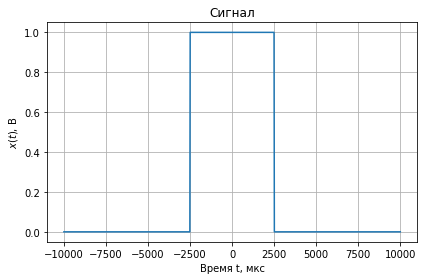

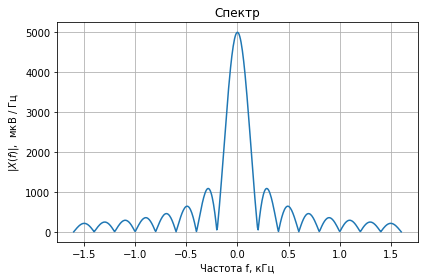

In [3]:
tau=5000e-6 #5000 мкс

f_band=np.linspace(-8/tau, 8/tau, 500) # 500 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if abs(t)<tau/2:
        return 1.0                 
    else:
        return 0.0                 
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

boxcar_y = fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6
plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, boxcar_y)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.tight_layout() 
plt.grid()

side_level_1 = get_side_level(boxcar_y)
main_width_1 = get_main_width(boxcar_y)
level_in_db_1 = get_level_in_db(side_level_1, boxcar_y[250])

треугольного окна
$$w_t(t)=\left\{ \begin{matrix}
   1-\dfrac{|t|}{\tau /2}, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$

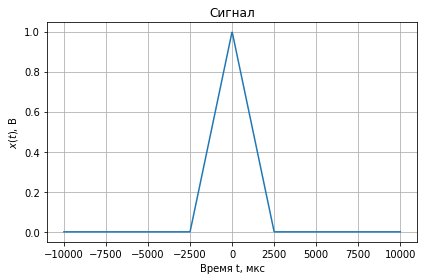

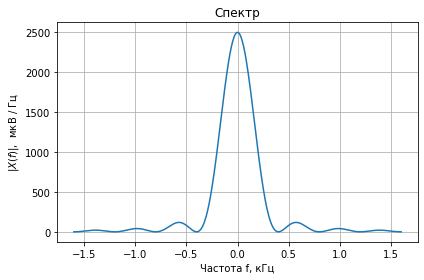

In [4]:
f_band=np.linspace(-8/tau, 8/tau, 500) # 500 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if abs(t)<tau/2:
        return 1-(abs(t))/(tau/2)                 
    else:
        return 0.0                 
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

triangle_y = fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6
plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, triangle_y)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.tight_layout() 
plt.grid()

side_level_2 = get_side_level(triangle_y)
main_width_2 = get_main_width(triangle_y)
level_in_db_2 = get_level_in_db(side_level_2, triangle_y[250])

окна Ханна
$$w_H(t)=\left\{ \begin{matrix}
   \dfrac{1}{2}\left( 1+\cos \left( 2\pi \dfrac{t}{\tau } \right) \right), & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$

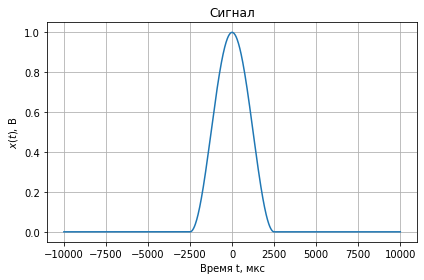

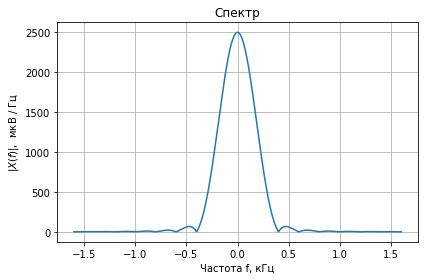

In [5]:
f_band=np.linspace(-8/tau, 8/tau, 500) # 500 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if abs(t)<tau/2:
        return (1/2)*(1+np.cos(2*np.pi*t/tau))                 
    else:
        return 0.0                 
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

hanny_y = fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6
plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, hanny_y)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.tight_layout() 
plt.grid()

side_level_3 = get_side_level(hanny_y)
main_width_3 = get_main_width(hanny_y)
level_in_db_3 = get_level_in_db(side_level_3, hanny_y[250])

In [7]:
import pandas as pd
from IPython.display import display, Markdown, Latex
d_table = { 
    'Окна:'                                     : ['прямоугольное', 'треугольное', 'Ханна'], 
    'Уровень боковых лепестков'                 : [side_level_1, side_level_2, side_level_3], 
    'Ширина главного лепестка'                  : [main_width_1, main_width_2, main_width_3],
    'Уровни первого бокового лепестка относительно главного': [level_in_db_1, level_in_db_2, level_in_db_3]
    } 

table = pd.DataFrame(data=d_table)
display(Markdown(table.to_markdown(index=False)))

| Окна:         |   Уровень боковых лепестков |   Ширина главного лепестка |   Уровни первого бокового лепестка относительно главного |
|:--------------|----------------------------:|---------------------------:|---------------------------------------------------------:|
| прямоугольное |                   1081.84   |                   0.404008 |                                                 -13.2925 |
| треугольное   |                    117.487  |                   0.673347 |                                                 -26.5572 |
| Ханна         |                     66.5073 |                   0.737475 |                                                 -31.5    |

## Задача 2.2. Теорема запаздывания для преобразования Фурье

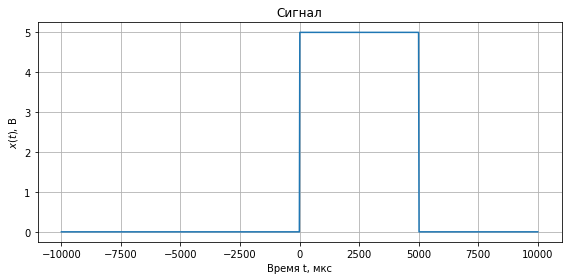

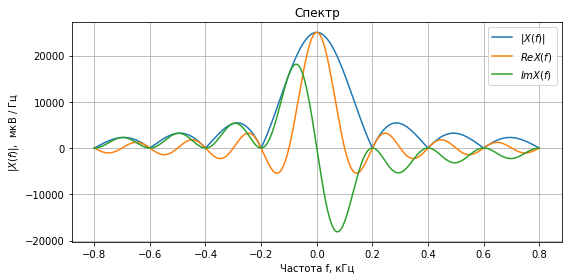

In [ ]:
tau=5000*1e-6 #5000 мкс

f_band=np.linspace(-4/tau, 4/tau, 1000) # 1000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0<t<tau:
        return 5 # 5 В
    else:
        return 0.0 # 0 В
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$')
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.grid()

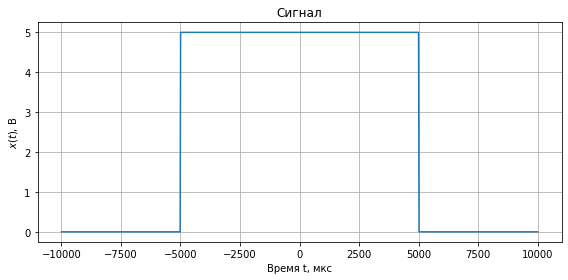

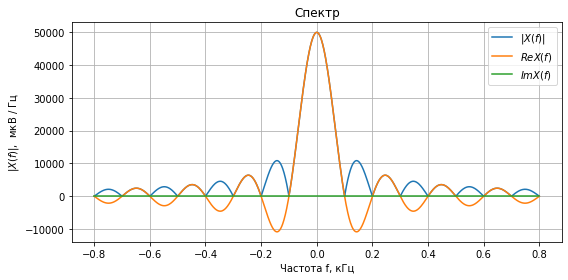

In [ ]:
tau=5000*1e-6 #5000 мкс

f_band=np.linspace(-4/tau, 4/tau, 1000) # 1000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if abs(t) < tau:
        return 5 # 5 В
    else:
        return 0.0 # 0 В
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$')
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.grid()

## Задача 2.3. Спектр отрезка синусоиды

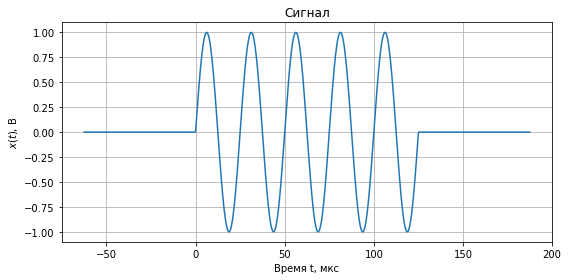

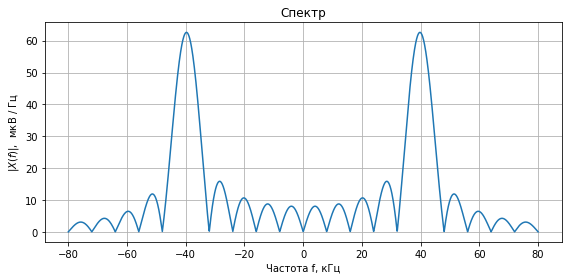

In [ ]:
f0=40*1e3       # 40 кГц
tau=125*1e-6    # 125 мкс

def sin_with_boxcar(t, tau):                            
    if 0<=t<=tau:
        # случай прямоугольного окна
        return np.sin(2*np.pi*f0*t) 
        # случай окна Ханна
        #
        return np.sin(2*np.pi*f0*t) * (0.5+0.5*np.cos(np.pi*(t-tau/2)/(tau/2)))
    else:
        return 0.0
    
f_band=np.linspace(-2*f0, 2*f0, 2000) 

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_boxcar(t, tau) for t in t_band])
plt.title("Сигнал")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

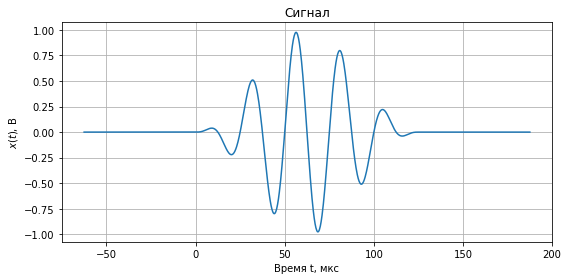

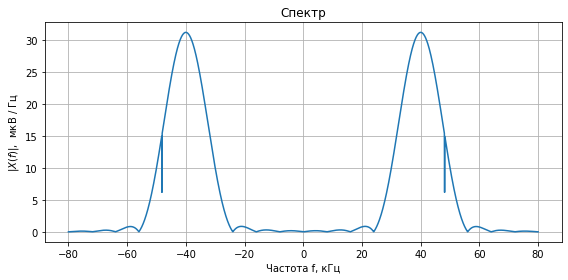

In [ ]:
f0=40*1e3       # 40 кГц
tau=125*1e-6    # 125 мкс

def sin_with_boxcar(t, tau):                            
    if 0<=t<=tau:
        # случай окна Ханна
        #
        return np.sin(2*np.pi*f0*t) * (0.5+0.5*np.cos(np.pi*(t-tau/2)/(tau/2)))
    else:
        return 0.0
    
f_band=np.linspace(-2*f0, 2*f0, 2000) 

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_boxcar(t, tau) for t in t_band])
plt.title("Сигнал")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

## Задача 2.4. Спектр пачки равноотстоящих импульсов

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: IntegrationWarning: The integral is probably divergent, or slowly convergent.


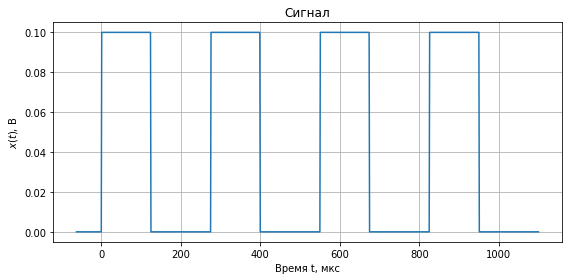

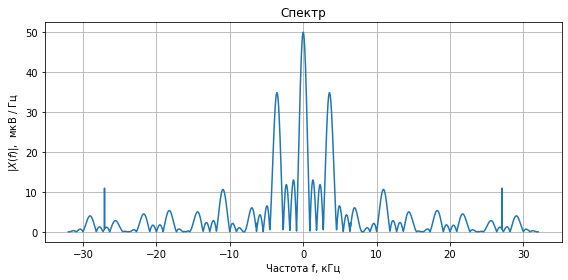

In [ ]:
N=4
tau=125e-6 #125 мкс
period = 275e-6 

f_band=np.linspace(-4/tau, 4/tau, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    
    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        if tau0 < t < tau1:
            return 0.1 # 0.1 В
    return 0.0 # 0 В
    
t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

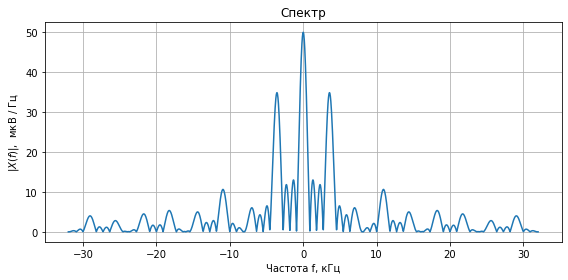

In [ ]:
def X(f):
    return 0.1 * tau * np.sin(np.pi * tau * f) / (np.pi * tau * f) * np.sin(np.pi * N * period * f) / np.sin(np.pi * period * f)

f_band=np.linspace(-4/tau, 4/tau, 2000)
t_band=np.linspace(-0.5*tau, N*period, 1024)

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, abs(X(f_band)) * 1e6)
plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()